In [2]:
#LIBRERÍAS NECESARIAS
library("FNN")
library("MASS")
library("stats")
library("readr")
library("caret")
library("e1071")
library("mclust")
library("sparcl")
library("kohonen")
library("cluster")
library("fields")
library(tree)
library(class)
library(randomForest)
library(tsne)
library(Rtsne)


Warning message:
"package 'FNN' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.
Warning message:
"package 'kohonen' was built under R version 3.5.3"
Attaching package: 'kohonen'

The following object is masked from 'package:mclust':

    map

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-1 (2018-12-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps

Attaching package: 'maps'

The following object is masked from 'package:cluster':

    votes.repub

The f

# · Creación del dataset

In [3]:
corazon=read.csv('corazon_r_FACS.csv', header = TRUE, sep = ',')
corazon=corazon[,-1]
bazo=read.csv('bazo_r_FACS.csv',header=TRUE)
bazo=bazo[,-1]
glandula=read.csv('glandula_r_FACS.csv',header=TRUE)
glandula=glandula[,-1]
timo=read.csv('timo_r_FACS.csv', header = TRUE, sep = ',')
timo=timo[,-1]
pulmon=read.csv('pulmon_r_FACS.csv',header=TRUE)
pulmon=pulmon[,-1]
rinon=read.csv('riñon_r_FACS.csv',header=TRUE)
rinon=rinon[,-1]
medula=read.csv('medula_r_FACS.csv', header = TRUE, sep = ',')
medula=medula[,-1]
vejiga=read.csv('vejiga_r_FACS.csv',header=TRUE)
vejiga=vejiga[,-1]
higado=read.csv('higado_r_FACS.csv',header=TRUE)
higado=higado[,-1]

df=rbind(corazon,bazo,glandula,timo,pulmon,rinon,medula,vejiga,higado)
dim(df)
head(df)

[1]  3600 23434

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

X0610005C13Rik,X0610007C21Rik,X0610007L01Rik,X0610007N19Rik,X0610007P08Rik,X0610007P14Rik,X0610007P22Rik,X0610008F07Rik,X0610009B14Rik,X0610009B22Rik,...,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,etiqueta
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,708,0,143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,...,0,0,2,90,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
0,4,17,0,0,2,0,0,0,0,...,0,0,0,1,0,642,0,0,0,2


### Separamos en train y test

In [4]:
y=df$etiqueta
x=df[,-ncol(df)]

In [5]:
set.seed(2)
indtrain = sample(1:3600, round(0.75*3600))
indtest = setdiff(1:3600, indtrain)
df.occ=data.frame(y, x)
df.train=df.occ[indtrain,]
df.test=df.occ[indtest,]

# · Clasificación con todos los datos

### KNN (dura mucho tiempo)

In [6]:
## predicción sobre test con k=1
predd=knn(df.train[,-1],df.test[,-1],df.train$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 57  3  2 10 18 17  2 23  0
         2  0 72  1  2  1 10  6  2  1
         3  0  3 75  0  0  0  0  0  2
         4  4  4  2 76  3  2  5  3  3
         5 17  3  2  6 62  7  5 10  0
         6  0  5  4  2  1 61  7  3  4
         7  4  5  2  5  1  6 72  6  0
         8  9  4  0  2  6  2  7 59  1
         9  0  5  6  0  0  1  0  0 89

Overall Statistics
                                          
               Accuracy : 0.6922          
                 95% CI : (0.6609, 0.7223)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6539          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.62637   0.6923  0.79787  0.73786  0.67391  0.57547
Specificity           0.90729 

# · Segmentación con todos los datos

### K-means

In [7]:
kmModel<-kmeans(df[,-ncol(df)],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster        3600 -none- numeric
centers      210897 -none- numeric
totss             1 -none- numeric
withinss          9 -none- numeric
tot.withinss      1 -none- numeric
betweenss         1 -none- numeric
size              9 -none- numeric
iter              1 -none- numeric
ifault            1 -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  55 138   0 111  11   1   0  84   0
         2  45 106   2  64  19   0   8  76  80
         3  94  98   0 116  42   6   0  41   3
         4  34  75  42  72  36  28  36  77   0
         5  74 131   0 105  49   9   0  32   0
         6  30 120   0  66  13   1   4 153  13
         7  10 121   0  35   1   0   0 233   0
         8  39  94   0  67  37  18   0 145   0
         9 131  41   0 137  26   2  59   3   1

Overall Statistics
                                          
               Accuracy : 0.1192          
                 95% CI : (0.1088, 0.1302)
    No Information Rate : 0.2567          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0091          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5  Class: 6
Sensitivity   

### t-sne y Rt-sne

sigma summary: Min. : 0.00986095475230433 |1st Qu. : 0.263174843105129 |Median : 0.382701539824964 |Mean : 0.391265225451 |3rd Qu. : 0.51760652393074 |Max. : 1.23410581840052 |
Epoch: Iteration #100 error is: 19.7462334074838
Epoch: Iteration #200 error is: 1.63493448305797
Epoch: Iteration #300 error is: 1.42199525731506
Epoch: Iteration #400 error is: 1.3331384528383
Epoch: Iteration #500 error is: 1.29842520239436
Epoch: Iteration #600 error is: 1.28055860899428
Epoch: Iteration #700 error is: 1.26958637857392
Epoch: Iteration #800 error is: 1.2617892449339
Epoch: Iteration #900 error is: 1.25677123007255
Epoch: Iteration #1000 error is: 1.25314441281542


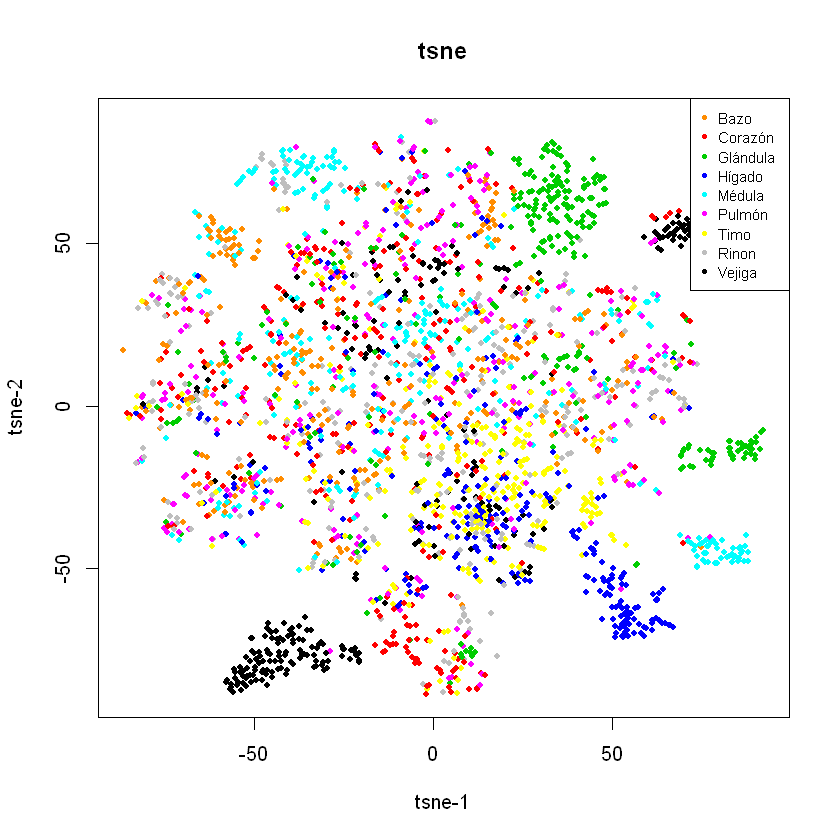

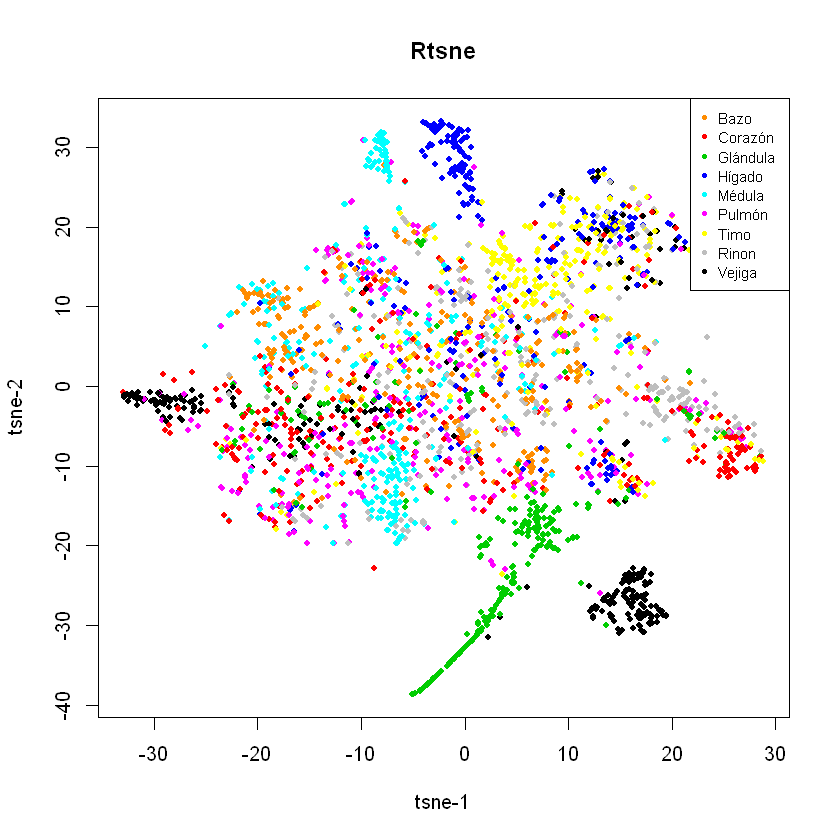

In [8]:
rtsne <- Rtsne(df.train[,2:1000],check_duplicates = FALSE)
tsne <- tsne(df.train[,2:1000])
colors=df.train$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [9]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  29   9  16  64  44   2  26  66  53
         2  27  56  12  41  29  17  51  33  30
         3 139  18  55  12  14   2  24  12  30
         4   3  16   8  23  21 180  16   4  26
         5  20   4  57  42  23   0  69  38  55
         6  23  22  41  33  45  13  59  17  41
         7   7  23  10  35  10 125  17   5  64
         8  13  18  25  41  33  49  31  22  62
         9  60 125   0  16   8  41  34   6  10

Overall Statistics
                                          
               Accuracy : 0.0919          
                 95% CI : (0.0812, 0.1034)
    No Information Rate : 0.1589          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0215         
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [10]:
#rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9,nstart = 100)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   9  50   9  85  11   2  23 120   0
         2  77  66  84  20   2  18   5  23   1
         3  17  19  31  16   4   0 103   5 111
         4  17  16  10  41  94  91   8  20   0
         5   5 117  19  41  56   0   1  69   0
         6  30  71  59  50  13  10  18  43   0
         7  30  10   9 104   9 111   3  20   0
         8  72  55  13  75  11  41   0  27   0
         9   4  26  94   4   0  43 122   5   2

Overall Statistics
                                          
               Accuracy : 0.0907          
                 95% CI : (0.0802, 0.1022)
    No Information Rate : 0.1615          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0226         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

# · Correlación para quedarnos con las columnas (genes) importantes

Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), m

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

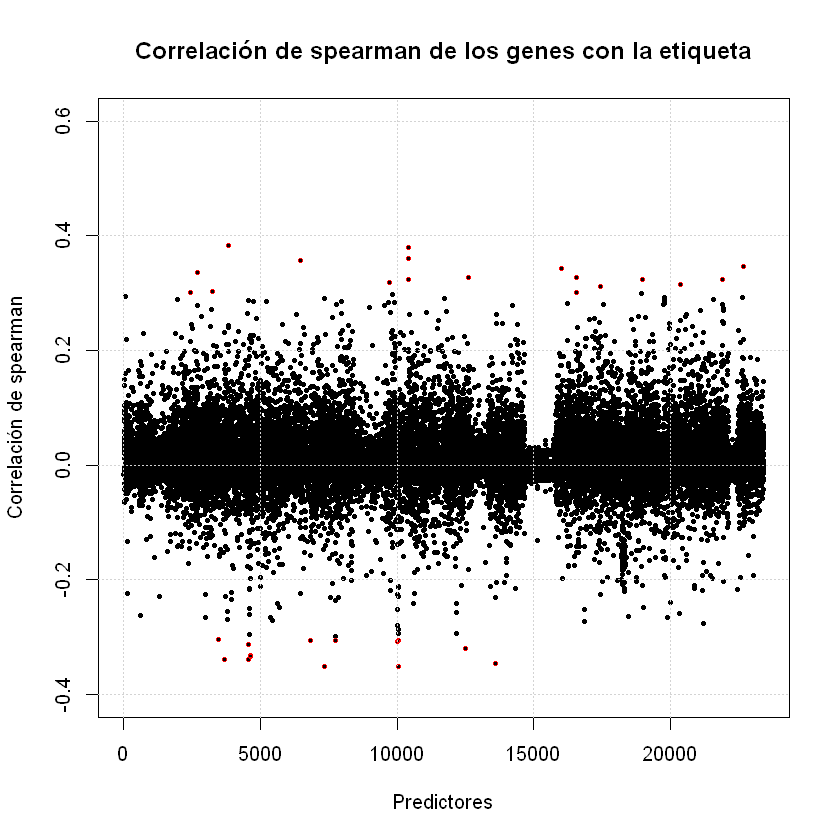

In [20]:
## correlación de spearman de cada gen con la etiqueta
r.xy = c()
for (ivar in 1:ncol(x)) {
  r.xy[ivar] = cor(as.numeric(y), as.integer((x[,ivar])), method = "spearman")
}
plot(r.xy, ylim = c(-0.4, 0.6), pch = 19, cex = 0.5, main="Correlación de spearman de los genes con la etiqueta", xlab = "Predictores", ylab = "Correlación de spearman")
grid()

ind.sele = which(abs(r.xy) > 0.3)
points(ind.sele, r.xy[ind.sele], col = "red", cex = 0.5)
#para eliminar predictores que no aportan ninguna informacion a nuestro problema (reducimos predictores)

In [21]:
length(ind.sele)

[1] 32

In [7]:
df.train2=df.train[,ind.sele]
df.test2=df.test[,ind.sele]
df.train2['y']=as.numeric(y[indtrain])
df.test2['y']=as.numeric(y[indtest])

# · Segmentación con índices seleccionados

### t-sne y Rt-sne

sigma summary: Min. : 2.98023223876953e-08 |1st Qu. : 0.183763199609797 |Median : 0.368645023723015 |Mean : 0.395529556096858 |3rd Qu. : 0.543607125011671 |Max. : 1.74725456498436 |
Epoch: Iteration #100 error is: 15.6127572443562
Epoch: Iteration #200 error is: 1.00670995058978
Epoch: Iteration #300 error is: 0.77608833023724
Epoch: Iteration #400 error is: 0.684433920166347
Epoch: Iteration #500 error is: 0.648769216342369
Epoch: Iteration #600 error is: 0.629587967981821
Epoch: Iteration #700 error is: 0.617653873620953
Epoch: Iteration #800 error is: 0.60951757469713
Epoch: Iteration #900 error is: 0.603548756828544
Epoch: Iteration #1000 error is: 0.598919371844474


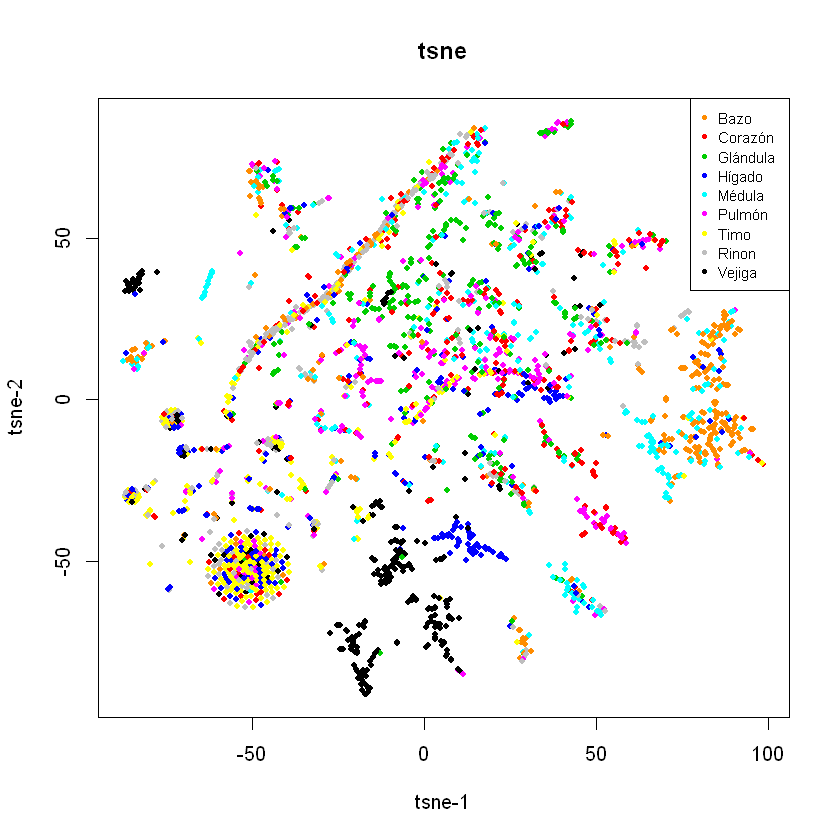

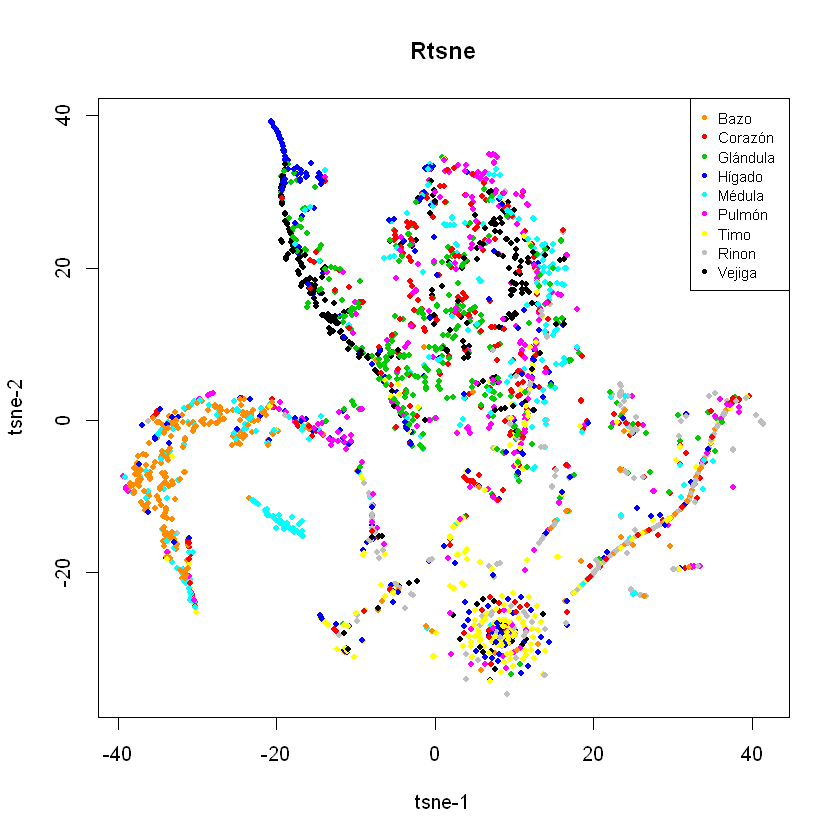

In [15]:
rtsne <- Rtsne(df.train2[,-ncol(df.train2)],check_duplicates = FALSE)
tsne <- tsne(df.train2[,-ncol(df.train2)])
colors=df.train2$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [16]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   4   9  20  50  13  16  12  13 172
         2  74  52  12  41  58  27  25   0   7
         3  76  38  13  70  84  18   2   4   1
         4  56  57  23  16  16  36  71  10  12
         5  48  41  27  32  45  23   3   5  84
         6  88  32   9  34  45  52  25   4   5
         7  24   1  40  20  12  57 133   4   5
         8  24  15  42  64  33  26  60   7  23
         9  16   7  35  10   8  23  27 174   0

Overall Statistics
                                          
               Accuracy : 0.1193          
                 95% CI : (0.1073, 0.1321)
    No Information Rate : 0.1519          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.009           
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [17]:
#-rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  23   6 229  10   4  29   0   0   8
         2  18  12  19  21  60  34  84  10  38
         3   6   2   0   3  52  22  67  40 114
         4  14  37  20  53  31   7  30  73  32
         5   7  35  95   3  43  13  84   7  21
         6  15   7  19  23  63  24  89   3  51
         7  24  48  11 136  38  14  11   0  14
         8  80  41   4  46  22  92   8   0   1
         9   0  19   0  25  26   0  93  78  59

Overall Statistics
                                          
               Accuracy : 0.0833          
                 95% CI : (0.0732, 0.0944)
    No Information Rate : 0.1726          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0313         
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

### K-means 

In [20]:
kmModel<-kmeans(df[,ind.sele],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster      3600   -none- numeric
centers       288   -none- numeric
totss           1   -none- numeric
withinss        9   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            9   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  21  47  64  50  26   1 168   9  14
         2  50  96 113   1  76   1   0  21  42
         3  36 108 148   0  85   0   0  10  13
         4  32  42 104   1 190   0  13   5  13
         5  43  98 106  26  24   1  78  10  14
         6  34  67  65   5  94  22   3  46  64
         7  13  21  18   0 333   0   3   1  11
         8  34  33  56   1 241   0   1  10  24
         9   6  35 230   0 128   0   0   0   1

Overall Statistics
                                          
               Accuracy : 0.0906          
                 95% CI : (0.0814, 0.1004)
    No Information Rate : 0.3325          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0231         
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3  Class: 4 Class: 5 Class: 6
Sensitivity   

# · Clasificación con índices seleccionados

### GLMs

In [8]:
# #GLM
# df.train$y=as.numeric(as.character(df.train$y))
# df.test$y=as.numeric(as.character(df.test$y))

numeros2<-function(n){
    df.train2$y[which(df.train2$y != n)] <- 0 ; df.train2$y[which(df.train2$y == n)] <- 1
    df.test$y[which(df.test2$y != n)] <- 0 ; df.test$y[which(df.test2$y == n)] <- 1
    DatT <- df.train2;
    Datt<- df.test2;
    M <- glm(y~., data = DatT[,], family = binomial(link = "logit"))
    Out <- M$fitted.values
    Outbin <- as.double(Out > 0.5)
    Acct<-100*sum(diag(table(DatT[,1], Outbin))) / length(Outbin)
    Out2<- predict(object=M, newdata = Datt[,]);
    Outbin2 <- as.double(Out2 > 0.5)
    AccT<-100*sum(diag(table(Datt[,1], Outbin2))) / length(Outbin2)
    
    return(AccT) 
}
A<-c()
for (i in 1:9){ 
    A<-c(A, numeros2(i))}

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object

In [9]:
A
print(mean(A))

[1] 95.88889 98.44444 99.66667 97.11111 97.44444 99.22222 99.88889 98.77778
[9] 92.44444

[1] 97.65432


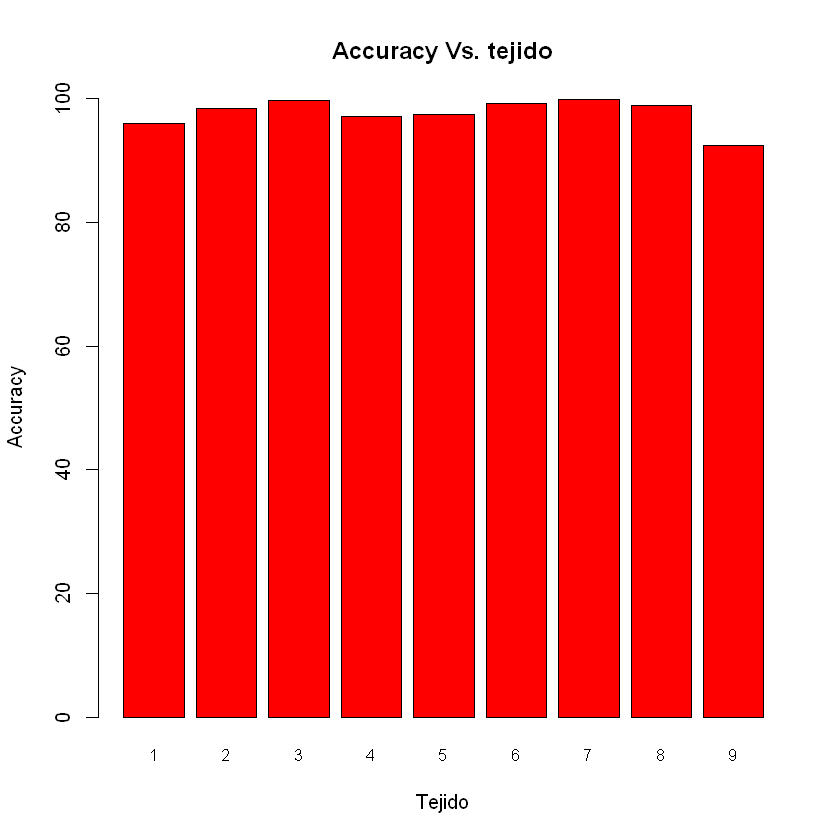

In [11]:
barplot(A,names.arg = 1:9,cex.names=0.8, ylab = "Accuracy", xlab="Tejido",col='red',ylim=c(0,100),main="Accuracy Vs. tejido")

### KNN

In [22]:
## prediccion sobre test con k=1
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 48  4  1  4 14  6  3 16  0
         2  4 23 10 11  5 21  9  8  6
         3  0 20 35  4  8  6  2  3  6
         4  7  8 10 29  3 10 13  3  9
         5 16  3  9  8 36 11  4  5  1
         6  2 13 11  7 16 24  2  3  6
         7  5 16  9 29  4 14 61 28 12
         8  9  7  4  6  4  9  7 40  4
         9  0 10  5  5  2  5  3  0 56

Overall Statistics
                                          
               Accuracy : 0.3911          
                 95% CI : (0.3591, 0.4239)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3147          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.52747  0.22115  0.37234  0.28155   0.3913  0.22642
Specificity           0.94067 

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Adam26b, Banf2"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: 

,k
12,23


ERROR: Error in confusionMatrix.default(as.factor(predd2), as.factor(df.test2$y)): the data cannot have more levels than the reference


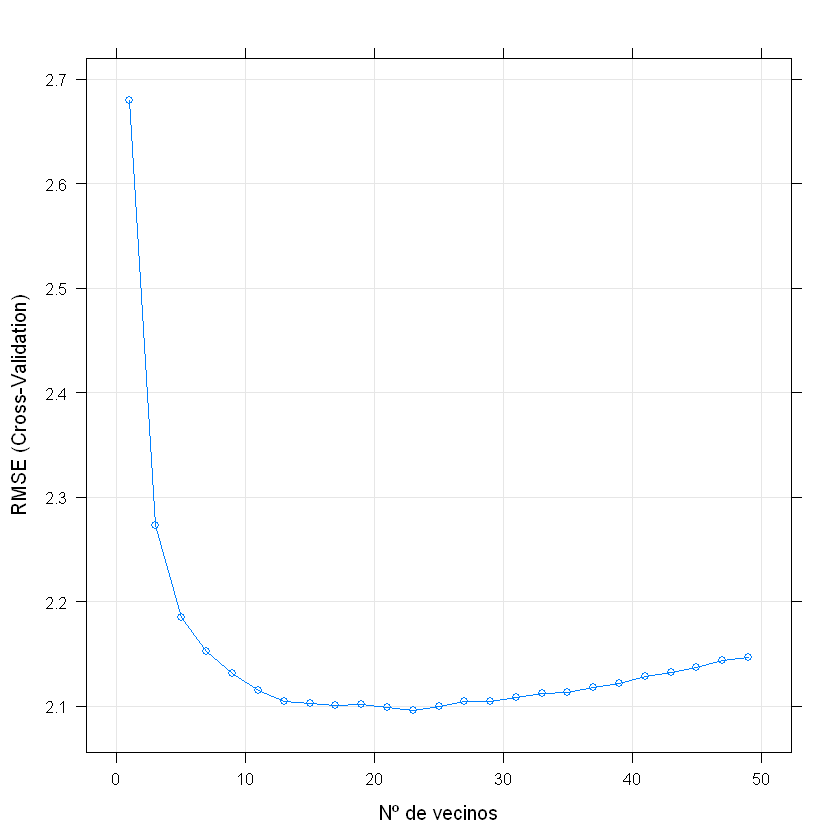

In [42]:
## búsqueda del k óptimo
trctrl=trainControl(method="cv", number=2) #divido mi train en 2, train y validation, de ahi saco mi model cv
knn.fit=train(y~.,df.train2, method="knn",trControl=trctrl, preProcess=c("center", "scale"), tuneGrid=expand.grid(k=seq(from = 1, to=50, by=2)))

plot(knn.fit, xlab = "Nº de vecinos")
knn.fit$bestTune
predd2 = predict(knn.fit, df.test2[,-ncol(df.test2)])
confusionMatrix(as.factor(predd2), as.factor(df.test2$y))

In [43]:
## predicción sobre test con k óptimo (23)
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=23)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 63  6  1  5 19 15  3  3  0
         2  1 16  5  6  4 12  4  5  1
         3  0 23 43  8 13  9  5  2  9
         4  1  3  6 26  1  2  3  1  4
         5  2  2  4  2 33  8  2  1  0
         6  0 15 11 10  8 28  6  1  4
         7  6 19  3 29  3 15 70 34 16
         8 18 11 10 12  7 13  8 59  0
         9  0  9 11  5  4  4  3  0 66

Overall Statistics
                                          
               Accuracy : 0.4489          
                 95% CI : (0.4161, 0.4821)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3797          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.6923  0.15385  0.45745  0.25243  0.35870  0.26415
Specificity            0.9357 

### Árboles de clasifición

In [12]:
df.train3=df.train2*1
df.test3=df.test2*1
df.train3$y=as.factor(df.train3$y)
df.test3$y=as.factor(df.test3$y)

In [13]:
## árbol completo
t = tree(formula = y ~ ., data = df.train3, control=tree.control(nrow(df.train3)) )

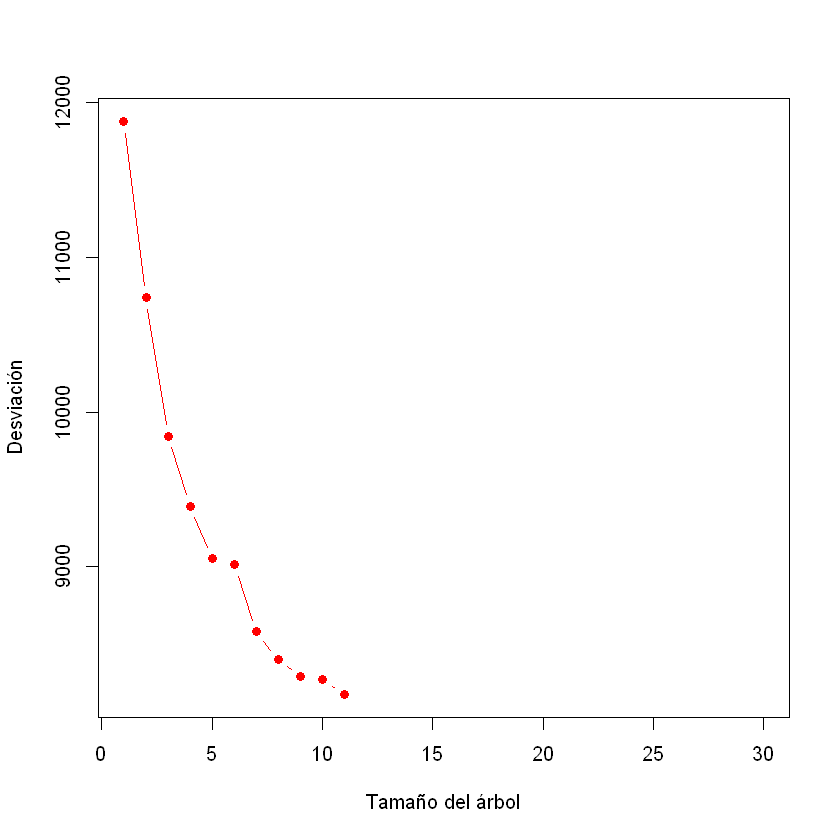

In [19]:
## búsqueda del tamaño de árbol óptimo
a=cv.tree(t, K = 10) #cross validation
plot(a$size,a$dev, xlab="Tamaño del árbol", ylab="Desviación", col="red",type="b", pch=19,xlim=c(1,30))

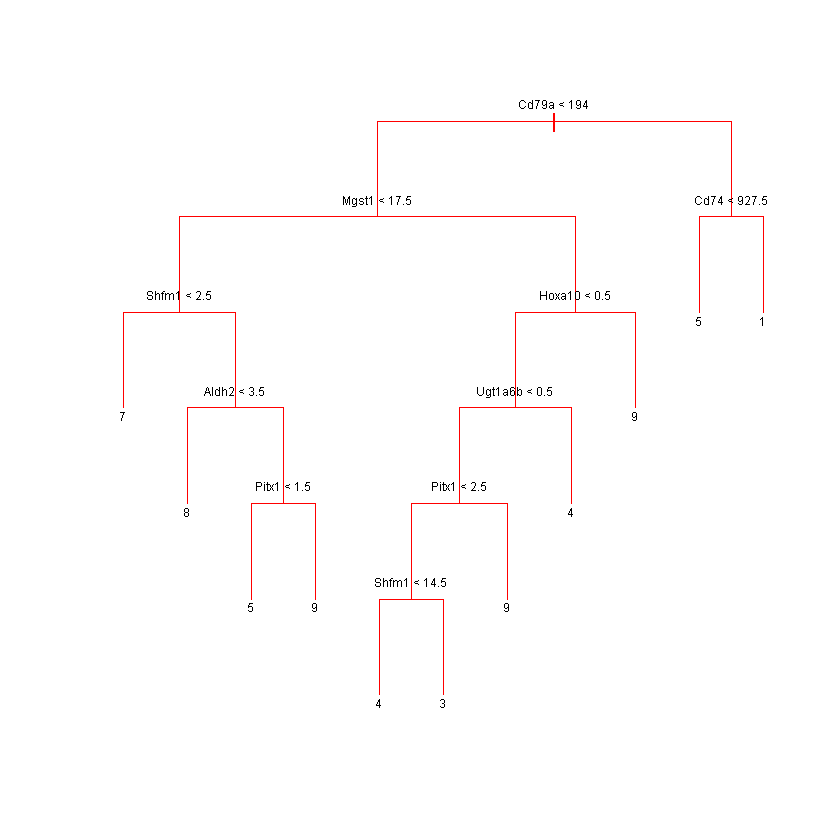

In [15]:
## podamos con tamaño óptimo
t.pruned=prune.tree(t, best = 11) #arbol podado
plot(t.pruned,type = "uniform",col="red")
text(t.pruned, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))

In [29]:
#predicción sobre test
pred.test= predict(t.pruned, df.test3,type="class")
confusionMatrix(pred.test,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 63  1  0  3 17  7  1  1  0
         2  0  0  0  0  0  0  0  0  0
         3  0 30 69 21 21 22  3  0  3
         4  0 11  5 26  4  6  2  0 10
         5  1 24 13 14 37 30 11  5  0
         6  0  0  0  0  0  0  0  0  0
         7  7 21  1 29  5 27 76 37 17
         8 20 17  5 10  7 14  8 63  0
         9  0  0  1  0  1  0  3  0 70

Overall Statistics
                                          
               Accuracy : 0.4489          
                 95% CI : (0.4161, 0.4821)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3809          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.6923   0.0000  0.73404  0.25243  0.40217   0.0000
Specificity            0.9629 

### Random Forest


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 43.11%
Confusion matrix:
    1  2   3   4   5   6   7   8   9 class.error
1 224  4   2   0   6   7  14  52   0   0.2750809
2   3 86  58  15   7  46  35  45   1   0.7094595
3   0 35 217   9  11  12   8   8   6   0.2908497
4  15 15  13 106   5  32  88  21   2   0.6430976
5  60 10  31   7 163  16   4  13   4   0.4707792
6   3 31  36   9  10 133  39  33   0   0.5476190
7   5 16   7  12   1  19 198  35   3   0.3310811
8   4 11   2   4   7  14  88 164   0   0.4421769
9   0  1   3   5   1   2  42   1 245   0.1833333

[1] 405 440

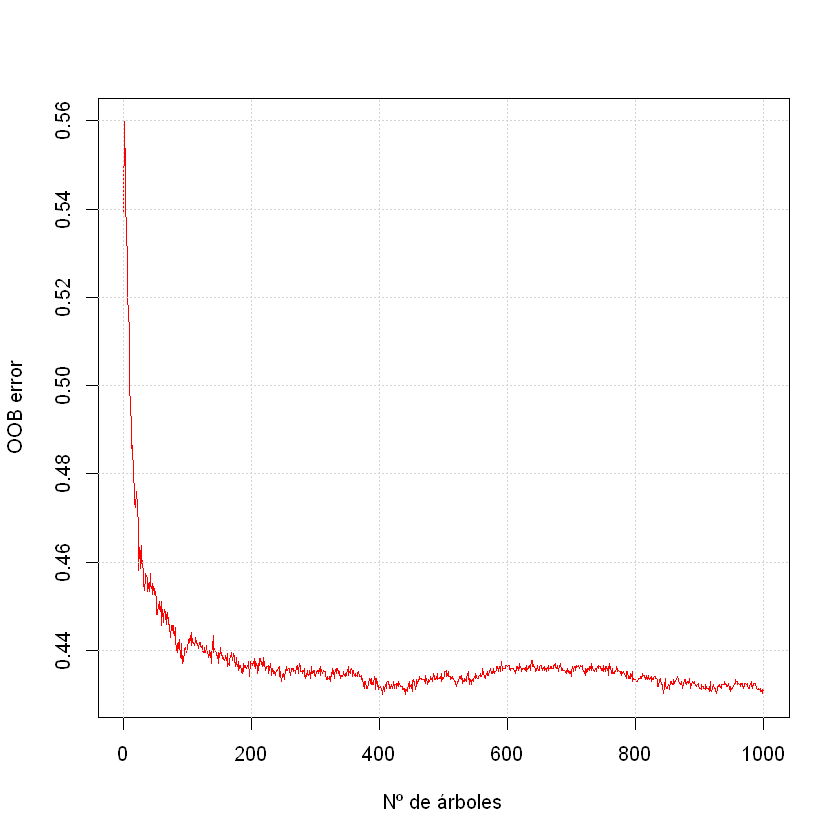

In [17]:
rf = randomForest(y ~., df.train3, ntree=1000)
rf
# OOB error
plot(rf$err.rate[, 1], type = "l", xlab = "Nº de árboles",col="red", ylab = "OOB error")
grid()
# número óptimo de árboles 
ntree = which(rf$err.rate[,1] == min(rf$err.rate[,1]))
ntree

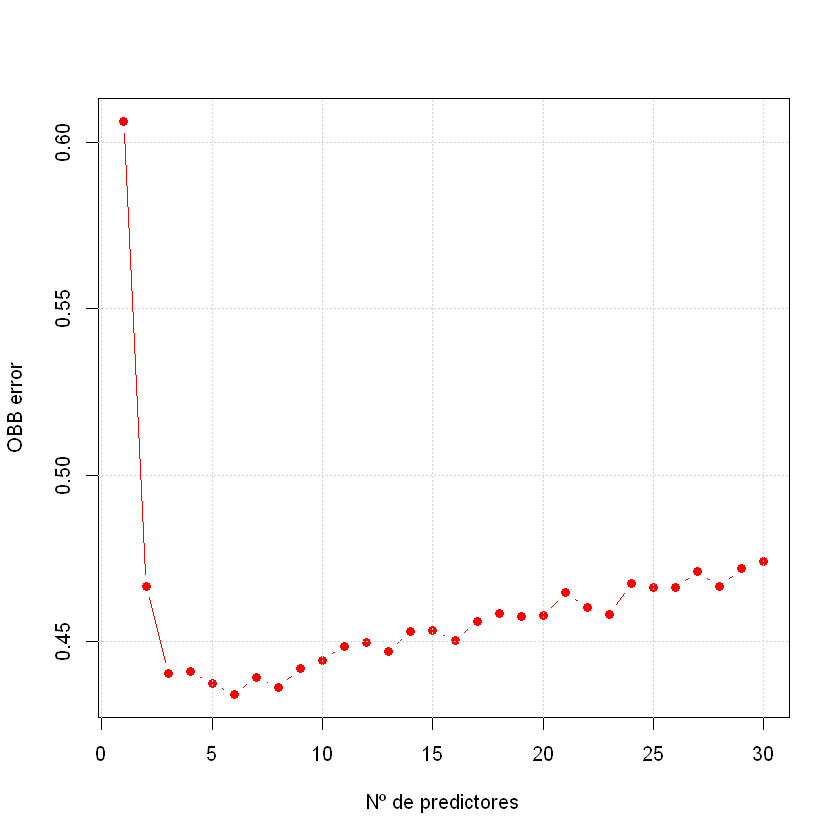

In [18]:
# búsqueda del número óptimo de predictores
err.oob = c()
for (mtry in 1:30) {
rf.mtry = randomForest(y ~., df.train3,ntree = ntree[1], mtry = mtry)
err.oob[mtry] = rf.mtry$err.rate[ntree[1], 1]
}

matplot(1:30 , err.oob, type = "b", pch = 19 ,lty = 1,col="red",ylab = "OBB error", xlab = "Nº de predictores")
grid()

In [23]:
## modelo con parámetros óptimos
rf.occ = randomForest(y ~., df.train3, ntree = ntree[1], mtry = 5)
rf.occ
## predicción sobre test
pred.r = predict(rf.occ, df.test3)


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = ntree[1],      mtry = 5) 
               Type of random forest: classification
                     Number of trees: 405
No. of variables tried at each split: 5

        OOB estimate of  error rate: 44.22%
Confusion matrix:
    1  2   3   4   5   6   7   8   9 class.error
1 222  3   2   1   8   8  14  51   0   0.2815534
2   2 85  60  19   6  44  36  43   1   0.7128378
3   0 37 213  10   7  15   8  10   6   0.3039216
4  17 16  15 102   4  30  92  20   1   0.6565657
5  60 10  28   6 164  16   4  14   6   0.4675325
6   3 35  42  13  11 120  39  31   0   0.5918367
7   3 14   7  16   3  19 196  34   4   0.3378378
8   4 11   2   6   8  14  90 159   0   0.4591837
9   0  1   3   5   1   1  44   0 245   0.1833333

In [33]:
confusionMatrix(pred.r,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 62  1  0  3 11  7  1  1  0
         2  0 27 10  7  5 14  8  2  1
         3  0 25 62 13 10 13  7  3  1
         4  1  7  7 31  3  2  1  0  1
         5  3  1  4  2 49  4  0  1  0
         6  0 17  5  9  3 42  5  1  0
         7  5 14  0 29  3 13 74 33 16
         8 20 11  5  8  6 11  7 65  1
         9  0  1  1  1  2  0  1  0 80

Overall Statistics
                                          
               Accuracy : 0.5467          
                 95% CI : (0.5135, 0.5795)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4897          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.68132  0.25962  0.65957  0.30097  0.53261  0.39623
Specificity           0.97033 

In [25]:
importancia=rf.occ$importance
i<-data.frame(importancia)
i2=i[order(i,decreasing = TRUE),]
genes=labels(importancia)[[1]]
genes=genes[order(i,decreasing = TRUE)]
dd=data.frame(i2,genes)

In [26]:
dd[1:20,]

i2,genes
187.86607,Mgst1
178.98490,Shfm1
167.67698,Cd74
160.55228,Aldh2
140.47986,Cd79a
69.12096,Hoxa10
59.88132,Ugt1a6b
59.54341,Pitrm1
56.77919,H2.DMb1
49.98360,H2.Oa


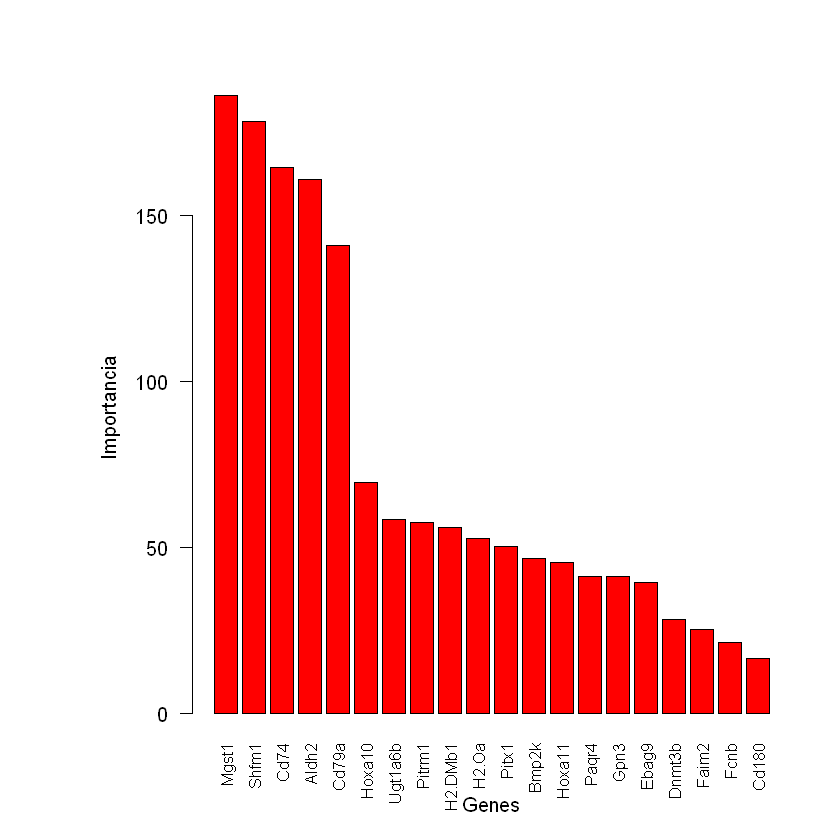

In [38]:
par(las=2) 
par(mar=c(5,8,4,2)) 
barplot(dd[1:20,1],names.arg = dd[1:20,2],cex.names=0.8, ylab = "Importancia", xlab="Genes",col = 'red')